In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing = pd.read_csv("Data.csv")
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
housing.shape

(506, 14)

In [5]:
mean=housing['MEDV'].mean()
housing['MEDV'].fillna(value=(mean),inplace=True)
#Having the missing values in our label data i.e "MEDV" so imputed with mean

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
housing['CHAS'].value_counts()

0    417
1     89
Name: CHAS, dtype: int64

In [8]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.269195,13.295257,9.205158,0.175889,1.101175,15.679800,58.744660,6.173308,78.063241,339.317787,42.614980,332.791107,11.537806,23.750442
std,2.399207,23.048697,7.169630,0.381103,1.646991,27.220206,33.104049,6.476435,203.542157,180.670077,87.585243,125.322456,6.064932,8.324335
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.430575,4.000000,254.000000,17.000000,364.995000,6.877500,19.000000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.925850,5.000000,307.000000,18.900000,390.660000,10.380000,22.750000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.332075,24.000000,403.000000,20.200000,395.615000,15.015000,25.000000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


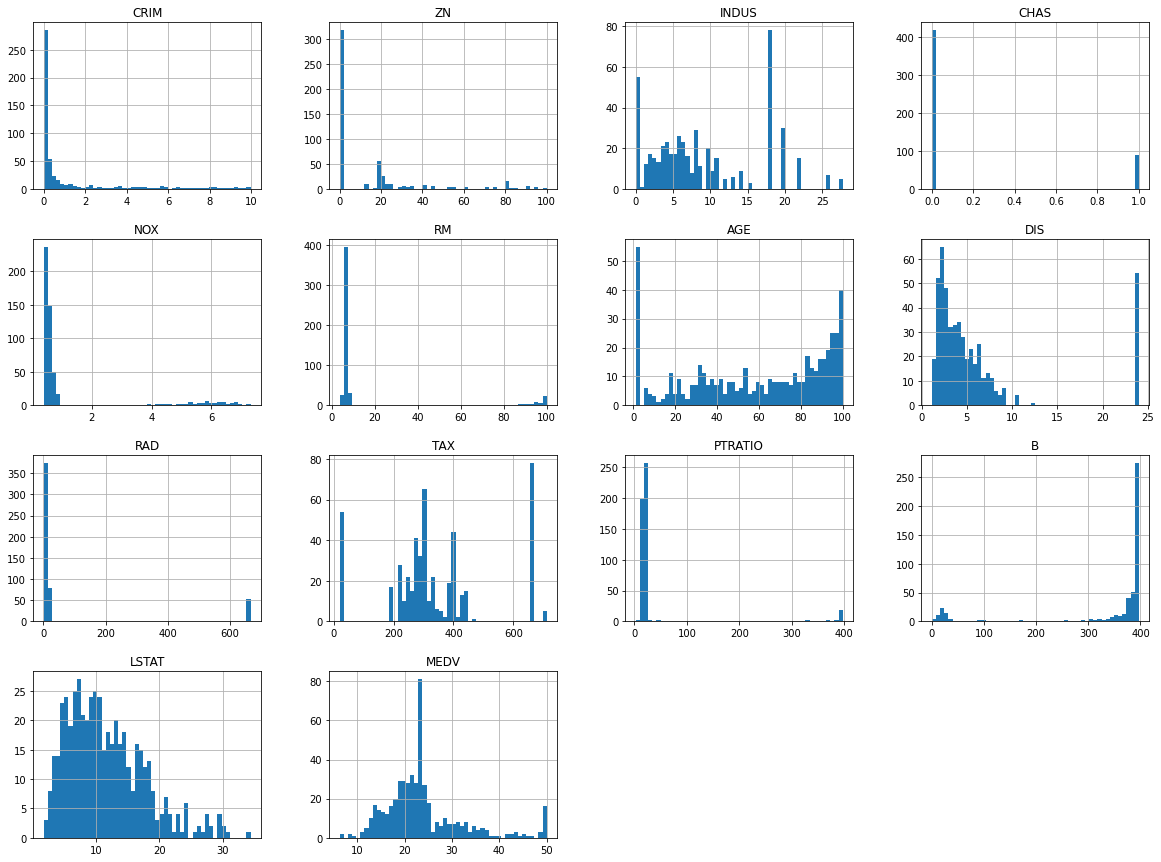

In [9]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

# Train Test Splitting(Understanding how it works)

In [10]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled= np.random.permutation(len(data))
    print(shuffled)
    test_size_set=int(len(data)*test_ratio)
    test_indices =shuffled[ :test_size_set]
    train_indices=shuffled[test_size_set : ]
    return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
train_set,test_set =split_train_test(housing,0.20)

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [12]:
print("rows in train_set :",len(train_set))
print("Rows in test_set :",len(test_set))

rows in train_set : 405
Rows in test_set : 101


# TRain test Split by using SKLearn

In [13]:
from sklearn.model_selection import train_test_split
trainset,testset =train_test_split(housing,test_size=0.20)
print("rows in train_set :",len(trainset))
print("Rows in test_set :",len(testset))

rows in train_set : 404
Rows in test_set : 102


In [14]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [15]:
#By using Stratified suffled we will split 'CHAS' feature of data distribution is equally in train & test.
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set =housing.loc[test_index]

In [16]:
 strat_train_set['CHAS'].value_counts()

0    333
1     71
Name: CHAS, dtype: int64

In [17]:
strat_test_set['CHAS'].value_counts()

0    84
1    18
Name: CHAS, dtype: int64

In [18]:
333/71

4.690140845070423

In [19]:
84/18

4.666666666666667

In [20]:
housing =strat_train_set.copy()

It shows by using stratifiedshuffled split, CHAS data distribution is equal in the train and test dataset

# Looking for coorelation

In [21]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)
#As we can check RM have the strong positive correlation with label"MEDV",
#LSTAT have the strong negative corr with MEDV

MEDV       1.000000
ZN         0.310294
B          0.147338
CHAS       0.107376
DIS        0.040265
RM         0.016551
RAD       -0.008182
PTRATIO   -0.010631
NOX       -0.021129
AGE       -0.231634
TAX       -0.269141
CRIM      -0.275564
INDUS     -0.361994
LSTAT     -0.676591
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

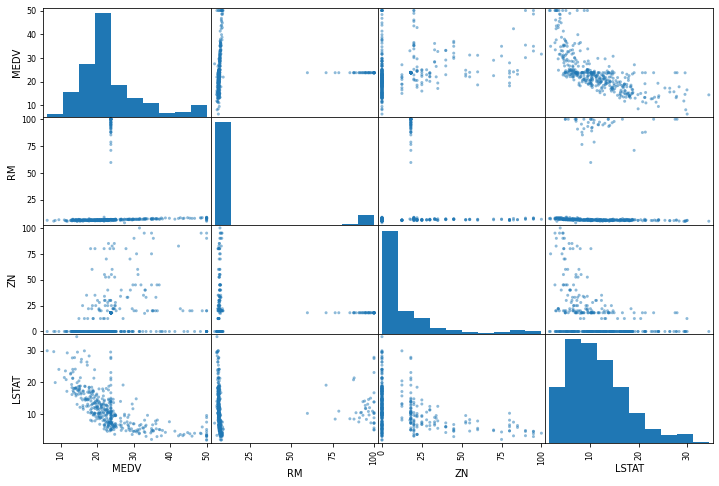

In [22]:
from pandas.plotting import scatter_matrix
attributes=['MEDV','RM','ZN','LSTAT']
scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

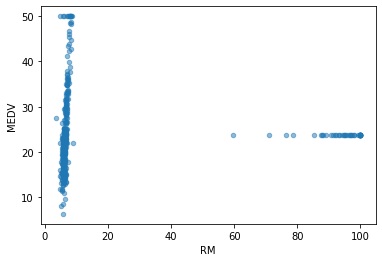

In [23]:
housing.plot(kind='scatter',x='RM',y='MEDV',alpha=0.5)
#To check closer view of RM & Outcome(MEDV) In this we found somthing problematic that "all data rounded to  50 value , 
#so we need to ask data provider why this so,means RM 6 ,7 ,9 also having MEDV 50, this is wrong,
#either we need to remove (otherwise model will get confuse) or ask data provider for the reason"

# Trying to contruct new attribute/feature

In [24]:
housing['TAXRM']=housing.TAX/housing.RM
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
438,0.00000,18.1,0.00,1,5.935,87.900,1.8206,24.0000,666,20.2,68.95,34.02,8.40,23.750442,0.229807
23,0.98843,0.0,8.14,0,0.538,5.813,100.0000,4.0952,4,307.0,21.00,394.54,19.88,14.500000,52.812661
191,0.06911,45.0,3.44,0,0.437,6.739,30.8000,6.4798,5,398.0,15.20,389.71,4.69,30.500000,59.059208
358,5.20177,0.0,18.10,1,0.770,6.127,83.4000,2.7227,24,666.0,20.20,395.43,11.48,22.700000,108.699200
144,2.77974,0.0,19.58,0,0.871,4.903,97.8000,1.3459,5,403.0,14.70,396.90,29.29,11.800000,82.194575


In [25]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
ZN         0.310294
B          0.147338
CHAS       0.107376
DIS        0.040265
RM         0.016551
RAD       -0.008182
PTRATIO   -0.010631
NOX       -0.021129
AGE       -0.231634
TAX       -0.269141
CRIM      -0.275564
TAXRM     -0.347294
INDUS     -0.361994
LSTAT     -0.676591
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

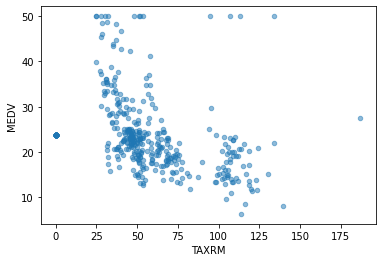

In [26]:
housing.plot(kind='scatter',x='TAXRM',y='MEDV',alpha=0.5)

In [27]:
#Seperating the features and lables
housing =strat_train_set.drop('MEDV',axis=1)   #this is our X only training
housing_lables=strat_train_set['MEDV']  #this is our y only training
print(housing_lables.sort_values(ascending=False))

186    50.0
372    50.0
368    50.0
257    50.0
371    50.0
       ... 
428    11.0
429     9.5
397     8.5
490     8.1
399     6.3
Name: MEDV, Length: 404, dtype: float64


# Handling Missing values by using sklearn imputer(FSP)

In [28]:
from sklearn.impute import SimpleImputer
imputer =SimpleImputer(strategy ='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [29]:
imputer.statistics_

array([1.4985e-01, 0.0000e+00, 7.8700e+00, 0.0000e+00, 5.3800e-01,
       6.3160e+00, 6.6800e+01, 3.8973e+00, 5.0000e+00, 3.0700e+02,
       1.9000e+01, 3.9024e+02, 1.0435e+01])

In [30]:
X =imputer.transform(housing)

In [31]:
housing_tr =pd.DataFrame(X,columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,1.296662,12.758416,9.429455,0.175743,1.122338,15.87046,58.818446,6.173058,79.693069,343.021782,44.390050,331.065470,11.562005
std,2.393572,21.862863,7.259604,0.381073,1.679737,27.45029,33.332735,6.543739,205.355275,183.115923,90.456848,126.853887,6.089713
min,0.000000,0.000000,0.000000,0.000000,0.389000,3.56100,1.137000,1.129600,1.000000,20.200000,7.680000,0.320000,1.730000
25%,0.053942,0.000000,3.440000,0.000000,0.453000,5.95800,31.750000,2.421900,4.000000,264.000000,17.225000,361.730000,6.745000
50%,0.149850,0.000000,7.870000,0.000000,0.538000,6.31600,66.800000,3.897300,5.000000,307.000000,19.000000,390.240000,10.435000
75%,0.963935,18.100000,18.100000,0.000000,0.647000,6.94000,90.000000,6.286525,24.000000,403.000000,20.200000,395.392500,14.852500
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.00000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000


In [32]:
housing_tr.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00000,18.1,0.00,1.0,5.935,87.900,1.8206,24.0000,666.0,20.2,68.95,34.02,8.40
1,0.98843,0.0,8.14,0.0,0.538,5.813,100.0000,4.0952,4.0,307.0,21.00,394.54,19.88
2,0.06911,45.0,3.44,0.0,0.437,6.739,30.8000,6.4798,5.0,398.0,15.20,389.71,4.69
3,5.20177,0.0,18.10,1.0,0.770,6.127,83.4000,2.7227,24.0,666.0,20.20,395.43,11.48
4,2.77974,0.0,19.58,0.0,0.871,4.903,97.8000,1.3459,5.0,403.0,14.70,396.90,29.29


all count is now 404 (training data set)---means all training dataset missing values imputed with median by using imputer,so now our training dataset with filled missing value is "housing_tr"

# Sklearn -Model design

Three Types of objects are avilable which required to understand to take command on ML
1. Estimators-It estimates some parameters based on the dataset. Ex-Imputer(used for fillna missing values handling)
It has the fit method and transform method
Fit method-Fits the dataset(learn from datset) and calculate internal parameters

2. Transformers -transform method takes input and return output based on learning from fit().It has the convinienced function i.e fit_transform() which fits and then transform.

3. Predictors-Ex-LinerRegression.
in this fit and predict two common functions are available.also gives score function which will evalaluate the predictions.

# Feature Scaling

Primarily we have 2 type of feature scaling method
1. Min-Max Scaling(Normalization)-converts values in 0 -1 range.
   formula= (value-min)/(max-min)
   sklearn provides a class called MinMaxScaler fro this
   
2. Standardization-
   (value-mean)/s.d
   sklearn provides class called StandardScaler for this

# Creating a Pipeline (Only for understanding)

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

#This is only for learning pipeline.

In [34]:
housing_num_tr=my_pipeline.fit_transform(housing)
housing_num_tr

array([[-0.54239845,  0.24462521, -1.30050439, ...,  0.27184678,
        -2.34453821, -0.51988095],
       [-0.1289346 , -0.58428923, -0.17784086, ..., -0.2588975 ,
         0.50099555,  1.36760292],
       [-0.51348948,  1.47654777, -0.82606182, ..., -0.32309597,
         0.46287304, -1.1298605 ],
       ...,
       [-0.54239845,  0.24462521, -1.30050439, ...,  3.90182774,
        -2.37161071, -1.07889186],
       [-0.51461472, -0.58428923, -0.74193101, ..., -0.30759979,
         0.4751859 , -0.76321511],
       [-0.52442394,  1.82002061, -0.56677343, ..., -0.30759979,
         0.3208805 , -0.33738034]])

In [35]:
housing_num_tr.shape

(404, 13)

# Selecting Model

In [36]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
438,0.00000,18.1,0.00,1,5.935,87.900,1.8206,24.0000,666,20.2,68.95,34.02,8.40
23,0.98843,0.0,8.14,0,0.538,5.813,100.0000,4.0952,4,307.0,21.00,394.54,19.88
191,0.06911,45.0,3.44,0,0.437,6.739,30.8000,6.4798,5,398.0,15.20,389.71,4.69
358,5.20177,0.0,18.10,1,0.770,6.127,83.4000,2.7227,24,666.0,20.20,395.43,11.48
144,2.77974,0.0,19.58,0,0.871,4.903,97.8000,1.3459,5,403.0,14.70,396.90,29.29


In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_num_tr,housing_lables)


LinearRegression()

In [38]:
some_data=housing.iloc[ :5]
some_labels=housing_lables.iloc[ : 5]
prepared_data=my_pipeline.transform(some_data)

In [39]:
model.predict(prepared_data) # this is the data we asking for outcome to model)

array([26.17460961, 16.5634138 , 28.55639785, 25.66026628, 10.75734564])

In [40]:
list(some_labels) # we are comparing predicted lables with existing lables [first 5 lables]

[23.750442477876106, 14.5, 30.5, 22.7, 11.8]

# Evaluation of Model

In [41]:
from sklearn.metrics import mean_squared_error
housing_predictions =model.predict(housing_num_tr)
lin_mse=mean_squared_error(housing_lables,housing_predictions)
lin_rmse=np.sqrt(lin_mse)

In [42]:
lin_mse

29.818361531377928

In [43]:
lin_rmse

5.460619152749799

In [44]:
mean # this is the mean of MEDV 

23.750442477876106

as we can see MEDV mean is 23.75044... 10% of this is 2.375.. so we seen that our modelis good when 

RMSE is less  than 10% of mean(outcome), so in this case ,5.40(lin_rmse)>2.375..(10% mean), so this is not good model

In [45]:
from sklearn.tree import DecisionTreeRegressor
regressor= DecisionTreeRegressor()
regressor.fit(housing_num_tr,housing_lables)

DecisionTreeRegressor()

In [46]:
from sklearn.metrics import mean_squared_error
housing_predictions =regressor.predict(housing_num_tr)
mse=mean_squared_error(housing_lables,housing_predictions)
rmse=np.sqrt(mse)

In [47]:
mse

2.3431512036267676e-32

In [48]:
rmse

1.530735510670203e-16

here our rmse is less than 2.3(10% of mean of MEDV), so our model with decision tree algorithm is good


still we will check model accuracy by using Cross Validation Techniq

In [49]:
from sklearn.ensemble import RandomForestRegressor
forest= RandomForestRegressor()
forest.fit(housing_num_tr,housing_lables)

RandomForestRegressor()

In [50]:
from sklearn.metrics import mean_squared_error
housing_predictions =forest.predict(housing_num_tr)
mse_forest=mean_squared_error(housing_lables,housing_predictions)
rmse_forest=np.sqrt(mse_forest)

In [51]:
mse_forest

1.333723802265347

In [52]:
rmse_forest

1.1548696040096245

# Cross Validation

In [53]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,housing_num_tr,housing_lables,scoring="neg_mean_squared_error",cv=10)
rmse_score_dec=np.sqrt(-score)
# cross validation for decision tree regressor using fold =10

In [54]:
rmse_score_dec

array([3.42512239, 5.96450953, 4.53595393, 2.98733097, 4.71455194,
       4.32954963, 3.30836062, 4.32845238, 2.81660256, 3.65694545])

In [55]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,housing_num_tr,housing_lables,scoring="neg_mean_squared_error",cv=10)
rmse_score_lin=np.sqrt(-score)
rmse_score_lin

#This is the cross validation for linear regression model

array([4.97245828, 5.73254076, 7.10907478, 5.70957187, 4.484085  ,
       5.25273423, 6.66699832, 5.57018255, 6.19153428, 5.46363986])

In [56]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(forest,housing_num_tr,housing_lables,scoring="neg_mean_squared_error",cv=10)
rmse_score_forest=np.sqrt(-score)
rmse_score_forest

array([2.64515936, 3.40800493, 5.13675756, 2.49386858, 2.5065726 ,
       3.48166172, 2.46716124, 2.79220671, 3.16649892, 3.67554768])

so as we checked above cross validation for our linear regression model & Decision tree regressor model

if comparing with both we got decision tree regressor having low rmse than linear mode

so DTRegressor is best for our problem

In [57]:
def print_score(scores):
    print('scores:',scores)
    print('mean:',scores.mean())
    print('Standard deviation:',scores.std())

In [58]:
print_score(rmse_score_dec) # decision tree

scores: [3.42512239 5.96450953 4.53595393 2.98733097 4.71455194 4.32954963
 3.30836062 4.32845238 2.81660256 3.65694545]
mean: 4.006737940915999
Standard deviation: 0.9069521754569854


In [59]:
print_score(rmse_score_lin) #Linear Regression 

scores: [4.97245828 5.73254076 7.10907478 5.70957187 4.484085   5.25273423
 6.66699832 5.57018255 6.19153428 5.46363986]
mean: 5.715281992951689
Standard deviation: 0.7376672802683024


In [60]:
print_score(rmse_score_forest)

scores: [2.64515936 3.40800493 5.13675756 2.49386858 2.5065726  3.48166172
 2.46716124 2.79220671 3.16649892 3.67554768]
mean: 3.177343929631903
Standard deviation: 0.7801553335426625


# Testing the model on test data

In [61]:
X_test = strat_test_set.drop('MEDV',axis=1)
Y_test = strat_test_set['MEDV'].copy()
x_test_prepared =my_pipeline.transform(X_test)
Final_predictions= forest.predict(x_test_prepared)

Final_mse=mean_squared_error(Y_test,Final_predictions)
Final_rmse = np.sqrt(Final_mse)

In [62]:
Final_mse

9.694559509252636

In [63]:
Final_rmse

3.113608759823982

So the conclusion is our model performance is good on test data also.

.

# Saving the model

In [64]:
from joblib import dump,load
dump(model,'Ansh.joblib')


['Ansh.joblib']

# Using the Model

In [65]:
from joblib import dump,load
import numpy as np
Final_model=load('Ansh.joblib')

In [66]:
housing_num_tr[0]

array([-0.54239845,  0.24462521, -1.30050439,  2.1656733 ,  2.86868137,
        2.62725281, -1.71208631,  2.72765224,  2.8586259 , -1.76512262,
        0.27184678, -2.34453821, -0.51988095])

In [67]:
features=np.array([[-0.54239845,  0.24462521, -1.30050439,  2.1656733 ,  2.86868137,
        3.62725281, -1.71208631,  2.72765224,  2.8586259 , -1.76512262,
        0.27184678, -2.34453821, -0.51988095]])
Final_model.predict(features)

array([30.44977985])

so as u can change the values of feature our output is getting change.

As feature RM is highly positive correlated with price of house(MEDV),so increase in RM(6th feature) will increse the prices

As feature RM is highly negative correlated with price of house(MEDV),so increase in RM(6th feature) will decrease the prices

.

####                                                                                                                                              Data Scientist Name-Anu

# ***-----000000-------000000------Thank You-------000000-----------000000---------***